### Importing Required Libraries

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

### Loading data

In [2]:
# Pima Indians Diabetes Database
# Predict the onset of diabetes based on diagnostic measures
# https://www.kaggle.com/uciml/pima-indians-diabetes-database

# load dataset
pima = pd.read_csv("../diabetes.csv")

In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [53]:
#pima.info()

### Feature Selection

In [4]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = pima[feature_cols] # Features (independent variables)
y = pima.Outcome # Target variable

### Splitting Data

In [5]:
# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) 

### Building the Logistic Regression Model

In [6]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# Predict labels
y_pred=logreg.predict(X_test)

C:\Users\rober\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluating the Model

In [7]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[109,  14],
       [ 29,  40]], dtype=int64)

In [8]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

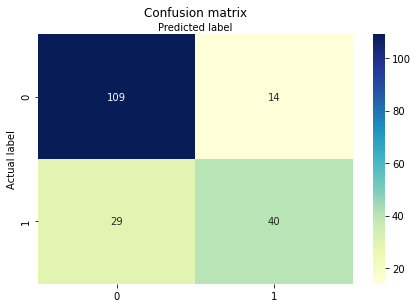

In [9]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [10]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7760416666666666
Precision: 0.7407407407407407
Recall: 0.5797101449275363


In [11]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       123
           1       0.74      0.58      0.65        69

    accuracy                           0.78       192
   macro avg       0.77      0.73      0.74       192
weighted avg       0.77      0.78      0.77       192



### Explaining the Logistic Regression Model

In [12]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.603679
         Iterations 5
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.063     
Dependent Variable:    Outcome            AIC:                709.4379  
Date:                  2020-08-28 12:11   BIC:                739.9307  
No. Observations:      576                Log-Likelihood:     -347.72   
Df Model:              6                  LL-Null:            -371.29   
Df Residuals:          569                LLR p-value:        1.7466e-08
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        5.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Pregnancies               0.1131   0.0328  3.4542 0

### Using the most relevant features

In [13]:
feature_cols = ['BMI', 'Age','Glucose']
X = pima[feature_cols] # Features (independent variables)
y = pima.Outcome # Target variable

In [14]:
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) 

In [15]:
import statsmodels.api as sm
logit_model_2=sm.Logit(y_train,X_train)
result_2=logit_model_2.fit()
print(result_2.summary2())

Optimization terminated successfully.
         Current function value: 0.653205
         Iterations 4
                        Results: Logit
Model:              Logit            Pseudo R-squared: -0.013  
Dependent Variable: Outcome          AIC:              758.4923
Date:               2020-08-28 12:11 BIC:              771.5606
No. Observations:   576              Log-Likelihood:   -376.25 
Df Model:           2                LL-Null:          -371.29 
Df Residuals:       573              LLR p-value:      1.0000  
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     4.0000                                     
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
BMI         -0.0388    0.0097  -4.0152  0.0001  -0.0577  -0.0198
Age         -0.0132    0.0073  -1.8044  0.0712  -0.0275   0.0011
Glucose      0.0100   

In [16]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# Predict labels
y_pred=logreg.predict(X_test)

In [17]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7864583333333334
Precision: 0.75
Recall: 0.6086956521739131


In [18]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       123
           1       0.75      0.61      0.67        69

    accuracy                           0.79       192
   macro avg       0.78      0.75      0.76       192
weighted avg       0.78      0.79      0.78       192

